# CIFAR Conv Net

И так, в этом ноутбуке Вы сделаете превую в своей жизни сверточную сеть! На сложном датасете. Cкачайте его кстати, 

In [22]:
!mkdir cifar10
!curl -o cifar-10-python.tar.gz https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xvzf cifar-10-python.tar.gz -C cifar10

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  162M  100  162M    0     0  9301k      0  0:00:17  0:00:17 --:--:-- 9484k
cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from cifar import load_CIFAR10
plt.rcParams['figure.figsize'] = (10.0, 8.0) 

cifar10_dir = 'cifar10/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

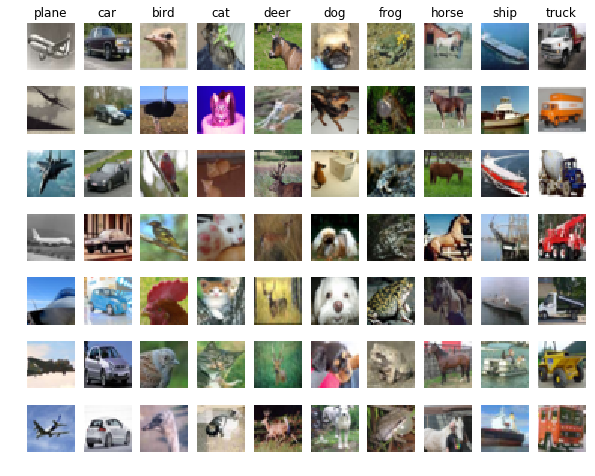

In [ ]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8').reshape(32, 32, 3))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

<h1 align="center">First of all — Checking Questions</h1> 

**Вопрос 1**: Чем отличаются современные сверточные сети от сетей 5 летней давности? 

Современные нейронные сети гораздо более глубокие. У них есть много интересных фишек, например, прокидывание градинтов. В сети с архитектурой ResNet используется похожая идея как в градиентном бустинге, а также есть WideResNet, которая не очень глубокая, но при этом широкая 

**Вопрос 2**: Какие неприятности могут возникнуть во время обучения современных нейросетей? 

* Огромное количество параметров сети нужно очень долго обучать и для нормального обучения нужны огромные датасеты. 
* Также они могут в какой-то момент перестать обучаться, потому что из-за большой глубины будут затухать градиенты 

**Вопрос 3**: У вас есть очень маленький датасет из 100 картинок, но вы очень хотите использовать нейросеть, какие неприятности вас ждут и как их решить? 

Данных слишком мало, для того чтобы обучить нейронную сеть с нуля, поэтому можно использовать уже обученную нейронную сеть, например. из model zoo. Далее можно поступать следующим образом: 
* Если наши данные похожи на данные, на которых обучалась сеть из зоопарка сетей, то можно просто убрать последние слои и подать выход сети уже на наших картинках какому-нибудь линейному классификатору 
* Если данные не похожи, то так как последние слои сети обычно предназначены для поиска признаков, специфичных именно для исходного датасета, лучше поставить какой-нибудь линейный классификатор на выходе более ранных слоёв 

**Вопрос 4**: У вас есть очень маленький датасет из 100 картинок, классификация, но вы очень хотите использовать нейросеть, какие неприятности вас ждут и как их решить? что делать если первый вариант решения не заработает? 

Можно как-нибудь искусственно увеличить количество данных, например, добавить шут к картинкам или как-нибудь их перевернуть, и считать, что это новые картинки, а потом снова попробовать воспользоваться первым вариантом)) 

**Вопрос 5**: Как сделать стайл трансфер для музыки? oO 

Сначала сделаем из музыки картинку, используя частотную характеристику. А потом для сделаем style transfer для картинки

In [ ]:
import lasagne
from theano import tensor as T
from lasagne.nonlinearities import *

input_X = T.tensor4("X")
target_y = T.vector("target Y integer",dtype='int64')

### Соберите нейронку: 
- Many times x (Conv+Pool)
- Many small convolutions like 3x3
- Batch Norm 
- Residual Connection
- Data Augmentation 
- Learning rate Schedule 
- ...

### Для вдохновения 
- http://torch.ch/blog/2015/07/30/cifar.html
- http://www.robots.ox.ac.uk/~vgg/research/very_deep/
- https://www.cs.unc.edu/~wliu/papers/GoogLeNet.pdf
- https://github.com/szagoruyko/wide-residual-networks 

### Самое интересное
- Для сдачи задания нужно набрать на точность тесте > **92.5**% (это займет много времени, торопитесь :) )
- Для получения бонусных баллов > **95.0**%
- Будет очень хорошо если вы придумаете свою архитектуру или сможете обучить что-то из вышеперечисленного :)
- А для обучения всего этого добра вам будет куда удобнее использовать GPU на Amazon 
    - Инструкция https://github.com/persiyanov/ml-mipt/tree/master/amazon-howto 
    - Вам помогут tmux, CuDNN, ssh tunnel, nvidia-smi, ... 
    - Wish you get fun :)

In [5]:
from lasagne.layers import  batch_norm

Самописная сеть

In [29]:
net = lasagne.layers.InputLayer(shape=(None, 3, 32, 32), input_var=input_X)

net =lasagne.layers.Conv2DLayer(net, num_filters=32, filter_size=(3,3), nonlinearity=rectify, 
                                          W=lasagne.init.HeNormal(gain='relu'))
net = lasagne.layers.Conv2DLayer(net, num_filters=32, filter_size=3) # , nonlinearity=rectify)

net = lasagne.layers.MaxPool2DLayer(net, pool_size=(2,2)) # , ignore_border=False)

net = lasagne.layers.Conv2DLayer(net, num_filters=64, filter_size=(3,3))
net = lasagne.layers.Conv2DLayer(net, num_filters=64, filter_size=3) # , nonlinearity=rectify)

net = lasagne.layers.MaxPool2DLayer(net, pool_size=(2,2)) # ,  ignore_border=False)

net = lasagne.layers.DenseLayer(net, num_units=128)
net = lasagne.layers.DropoutLayer(net, p=0.1)
net = lasagne.layers.DenseLayer(net, num_units=64) # , W=lasagne.init.HeNormal(gain='relu'))
net = lasagne.layers.DropoutLayer(net, p=0.1)

net = lasagne.layers.DenseLayer(net, num_units = 10, nonlinearity=softmax)

сеть из интернета, считается очень долго((

In [ ]:
import sys
sys.setrecursionlimit(10000)
import lasagne
from lasagne.nonlinearities import rectify, softmax, sigmoid
from lasagne.layers import InputLayer, MaxPool2DLayer, DenseLayer, DropoutLayer, helper, batch_norm, BatchNormLayer
# for ResNet
from lasagne.layers import Conv2DLayer as ConvLayer
from lasagne.layers import Pool2DLayer, ElemwiseSumLayer, NonlinearityLayer, PadLayer, GlobalPoolLayer, ExpressionLayer
from lasagne.init import Orthogonal, HeNormal, GlorotNormal

PIXELS = 32
imageSize = PIXELS * PIXELS
num_features = imageSize * 3

he_norm = HeNormal(gain='relu')

In [ ]:
def ResNet_FullPre_Wide(input_var=None, n=6, k=4):
    '''
    Adapted from https://github.com/Lasagne/Recipes/tree/master/papers/deep_residual_learning.

    Tweaked to be consistent with 'Identity Mappings in Deep Residual Networks', Kaiming He et al. 2016 (https://arxiv.org/abs/1603.05027)

    And 'Wide Residual Networks', Sergey Zagoruyko, Nikos Komodakis 2016 (http://arxiv.org/pdf/1605.07146v1.pdf)

    Depth = 6n + 2
    '''
    n_filters = {0:16, 1:16*k, 2:32*k, 3:64*k}

    # create a residual learning building block with two stacked 3x3 convlayers as in paper
    def residual_block(l, increase_dim=False, projection=True, first=False, filters=16):
        if increase_dim:
            first_stride = (2,2)
        else:
            first_stride = (1,1)

        if first:
            # hacky solution to keep layers correct
            bn_pre_relu = l
        else:
            # contains the BN -> ReLU portion, steps 1 to 2
            bn_pre_conv = BatchNormLayer(l)
            bn_pre_relu = NonlinearityLayer(bn_pre_conv, rectify)

        # contains the weight -> BN -> ReLU portion, steps 3 to 5
        conv_1 = batch_norm(ConvLayer(bn_pre_relu, num_filters=filters, filter_size=(3,3), stride=first_stride, nonlinearity=rectify, pad='same', W=he_norm))

        #dropout = DropoutLayer(conv_1, p=0.3)

        # contains the last weight portion, step 6
        conv_2 = ConvLayer(conv_1, num_filters=filters, filter_size=(3,3), stride=(1,1), nonlinearity=None, pad='same', W=he_norm)

        # add shortcut connections
        if increase_dim:
            # projection shortcut, as option B in paper
            projection = ConvLayer(bn_pre_relu, num_filters=filters, filter_size=(1,1), stride=(2,2), nonlinearity=None, pad='same', b=None)
            block = ElemwiseSumLayer([conv_2, projection])

        elif first:
            # projection shortcut, as option B in paper
            projection = ConvLayer(l, num_filters=filters, filter_size=(1,1), stride=(1,1), nonlinearity=None, pad='same', b=None)
            block = ElemwiseSumLayer([conv_2, projection])

        else:
            block = ElemwiseSumLayer([conv_2, l])

        return block

    # Building the network
    l_in = InputLayer(shape=(None, 3, PIXELS, PIXELS), input_var=input_var)

    # first layer, output is 16 x 64 x 64
    l = batch_norm(ConvLayer(l_in, num_filters=n_filters[0], filter_size=(3,3), stride=(1,1), nonlinearity=rectify, pad='same', W=he_norm))

    # first stack of residual blocks, output is 32 x 64 x 64
    l = residual_block(l, first=True, filters=n_filters[1])
    for _ in range(1,n):
        l = residual_block(l, filters=n_filters[1])

    # second stack of residual blocks, output is 64 x 32 x 32
    l = residual_block(l, increase_dim=True, filters=n_filters[2])
    for _ in range(1,(n+2)):
        l = residual_block(l, filters=n_filters[2])

    # third stack of residual blocks, output is 128 x 16 x 16
    l = residual_block(l, increase_dim=True, filters=n_filters[3])
    for _ in range(1,(n+2)):
        l = residual_block(l, filters=n_filters[3])

    bn_post_conv = BatchNormLayer(l)
    bn_post_relu = NonlinearityLayer(bn_post_conv, rectify)

    # average pooling
    avg_pool = GlobalPoolLayer(bn_post_relu)

    # fully connected layer
    network = DenseLayer(avg_pool, num_units=10, W=HeNormal(), nonlinearity=softmax)

    return network

In [ ]:
net = ResNet_FullPre_Wide(input_var=input_X)

In [ ]:
y_predicted = lasagne.layers.get_output(net)
all_weights = lasagne.layers.get_all_params(net, trainable=True)
print(all_weights)

In [ ]:
# l2_penalty = lasagne.regularization.regularize_network_params(net, lasagne.regularization.l2) * 0.0001
loss = lasagne.objectives.categorical_crossentropy(y_predicted, target_y).mean()
# loss = loss + l2_penalty
accuracy = lasagne.objectives.categorical_accuracy(y_predicted, target_y).mean()

In [ ]:
updates = lasagne.updates.adam(loss, all_weights, learning_rate = 0.0001)
train_fun = theano.function([input_X,target_y],[loss, accuracy], updates=updates, allow_input_downcast=True)
y_pred_det = lasagne.layers.get_output(net, deterministic=True)
acc_det = lasagne.objectives.categorical_accuracy(y_pred_det, target_y).mean()
accuracy_fun = theano.function([input_X,target_y],acc_det, allow_input_downcast=True)

### Вот и всё, пошли её учить

In [12]:
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.arange(len(inputs))
        np.random.shuffle(indices)
    for start_idx in range(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

In [13]:
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(X_train, y_train)

# нормируем данные
def prep(x):
    x = x - 128
    x = x / 128
    return x
xtrain = prep(xtrain)
xval = prep(xval)

# Процесс обучения

In [ ]:
import time
from tqdm import tqdm

num_epochs = 200 #количество проходов по данным

batch_size = 128 #размер мини-батча

train_accuracy = []
test_accuracy = []
train_loss = []

for epoch in tqdm(range(num_epochs)):
    # In each epoch, we do a full pass over the training data:
    train_err = 0
    train_acc = 0
    train_batches = 0
    start_time = time.time()
    for batch in iterate_minibatches(xtrain, ytrain,batch_size, shuffle=True):
        inputs, targets = batch
        train_err_batch, train_acc_batch= train_fun(inputs.transpose(0,3,1,2), targets)
        train_err += train_err_batch
        train_acc += train_acc_batch
        train_batches += 1

    # And a full pass over the validation data:
    val_acc = 0
    val_batches = 0
    for batch in iterate_minibatches(xval, yval, batch_size):
        inputs, targets = batch
        val_acc += accuracy_fun(inputs.transpose(0,3,1,2), targets)
        val_batches += 1

    
    # Then we print the results for this epoch:
    print("Epoch {} of {} took {:.3f}s".format(
        epoch + 1, num_epochs, time.time() - start_time))

    print("  training loss (in-iteration):\t\t{:.6f}".format(train_err / train_batches))
    print("  train accuracy:\t\t{:.2f} %".format(
        train_acc / train_batches * 100))
    print("  validation accuracy:\t\t{:.2f} %".format(
        val_acc / val_batches * 100))
    
    train_accuracy.append(train_acc / train_batches * 100)
    test_accuracy.append(val_acc / val_batches * 100)
    train_loss.append(train_err / train_batches)


  0%|          | 1/200 [00:13<45:17, 13.65s/it]

Epoch 1 of 200 took 13.653s
  training loss (in-iteration):		1.951877
  train accuracy:		28.85 %
  validation accuracy:		42.41 %


  1%|          | 2/200 [00:27<45:02, 13.65s/it]

Epoch 2 of 200 took 13.639s
  training loss (in-iteration):		1.638059
  train accuracy:		40.60 %
  validation accuracy:		48.20 %


  2%|▏         | 3/200 [00:41<45:17, 13.80s/it]

Epoch 3 of 200 took 14.134s
  training loss (in-iteration):		1.495418
  train accuracy:		46.09 %
  validation accuracy:		51.47 %


  2%|▏         | 4/200 [00:55<45:18, 13.87s/it]

Epoch 4 of 200 took 14.036s
  training loss (in-iteration):		1.396926
  train accuracy:		50.11 %
  validation accuracy:		54.16 %


  2%|▎         | 5/200 [01:09<45:08, 13.89s/it]

Epoch 5 of 200 took 13.935s
  training loss (in-iteration):		1.327667
  train accuracy:		52.64 %
  validation accuracy:		55.65 %


  3%|▎         | 6/200 [01:23<44:46, 13.85s/it]

Epoch 6 of 200 took 13.751s
  training loss (in-iteration):		1.272876
  train accuracy:		54.64 %
  validation accuracy:		57.14 %


  4%|▎         | 7/200 [01:36<44:28, 13.82s/it]

Epoch 7 of 200 took 13.769s
  training loss (in-iteration):		1.221601
  train accuracy:		56.71 %
  validation accuracy:		58.23 %


  4%|▍         | 8/200 [01:50<44:24, 13.88s/it]

Epoch 8 of 200 took 14.008s
  training loss (in-iteration):		1.174909
  train accuracy:		58.38 %
  validation accuracy:		60.21 %


  4%|▍         | 9/200 [02:05<44:38, 14.02s/it]

Epoch 9 of 200 took 14.357s
  training loss (in-iteration):		1.138951
  train accuracy:		59.80 %
  validation accuracy:		61.12 %


  5%|▌         | 10/200 [02:19<44:15, 13.98s/it]

Epoch 10 of 200 took 13.864s
  training loss (in-iteration):		1.103694
  train accuracy:		61.02 %
  validation accuracy:		61.67 %


  6%|▌         | 11/200 [02:32<43:50, 13.92s/it]

Epoch 11 of 200 took 13.779s
  training loss (in-iteration):		1.069336
  train accuracy:		62.50 %
  validation accuracy:		62.48 %


  6%|▌         | 12/200 [02:47<43:51, 14.00s/it]

Epoch 12 of 200 took 14.190s
  training loss (in-iteration):		1.046432
  train accuracy:		63.28 %
  validation accuracy:		63.47 %


  6%|▋         | 13/200 [03:01<43:44, 14.03s/it]

Epoch 13 of 200 took 14.112s
  training loss (in-iteration):		1.012182
  train accuracy:		64.27 %
  validation accuracy:		64.71 %


  7%|▋         | 14/200 [03:15<43:29, 14.03s/it]

Epoch 14 of 200 took 14.027s
  training loss (in-iteration):		0.984418
  train accuracy:		65.38 %
  validation accuracy:		65.10 %


  8%|▊         | 15/200 [03:29<43:44, 14.18s/it]

Epoch 15 of 200 took 14.540s
  training loss (in-iteration):		0.962034
  train accuracy:		66.45 %
  validation accuracy:		65.91 %


  8%|▊         | 16/200 [03:43<43:29, 14.18s/it]

Epoch 16 of 200 took 14.177s
  training loss (in-iteration):		0.936291
  train accuracy:		67.31 %
  validation accuracy:		66.16 %


  8%|▊         | 17/200 [03:58<43:41, 14.32s/it]

Epoch 17 of 200 took 14.653s
  training loss (in-iteration):		0.917795
  train accuracy:		67.85 %
  validation accuracy:		66.59 %


  9%|▉         | 18/200 [04:12<43:26, 14.32s/it]

Epoch 18 of 200 took 14.318s
  training loss (in-iteration):		0.888947
  train accuracy:		68.77 %
  validation accuracy:		66.83 %


 10%|▉         | 19/200 [04:26<42:34, 14.11s/it]

Epoch 19 of 200 took 13.615s
  training loss (in-iteration):		0.875561
  train accuracy:		68.98 %
  validation accuracy:		67.35 %


 10%|█         | 20/200 [04:40<42:27, 14.15s/it]

Epoch 20 of 200 took 14.256s
  training loss (in-iteration):		0.854319
  train accuracy:		70.18 %
  validation accuracy:		67.96 %


 10%|█         | 21/200 [04:54<42:12, 14.15s/it]

Epoch 21 of 200 took 14.128s
  training loss (in-iteration):		0.827302
  train accuracy:		70.89 %
  validation accuracy:		68.12 %


 11%|█         | 22/200 [05:09<42:06, 14.20s/it]

Epoch 22 of 200 took 14.311s
  training loss (in-iteration):		0.812068
  train accuracy:		71.55 %
  validation accuracy:		67.94 %


 12%|█▏        | 23/200 [05:23<41:49, 14.18s/it]

Epoch 23 of 200 took 14.134s
  training loss (in-iteration):		0.791113
  train accuracy:		72.32 %
  validation accuracy:		68.92 %


 12%|█▏        | 24/200 [05:37<41:35, 14.18s/it]

Epoch 24 of 200 took 14.176s
  training loss (in-iteration):		0.779174
  train accuracy:		72.90 %
  validation accuracy:		68.54 %


 12%|█▎        | 25/200 [05:51<41:28, 14.22s/it]

Epoch 25 of 200 took 14.311s
  training loss (in-iteration):		0.761397
  train accuracy:		73.50 %
  validation accuracy:		68.91 %


 13%|█▎        | 26/200 [06:05<40:57, 14.12s/it]

Epoch 26 of 200 took 13.892s
  training loss (in-iteration):		0.740491
  train accuracy:		74.04 %
  validation accuracy:		68.97 %


 14%|█▎        | 27/200 [06:19<40:37, 14.09s/it]

Epoch 27 of 200 took 14.019s
  training loss (in-iteration):		0.722267
  train accuracy:		74.86 %
  validation accuracy:		69.56 %


 14%|█▍        | 28/200 [06:34<40:30, 14.13s/it]

Epoch 28 of 200 took 14.232s
  training loss (in-iteration):		0.715197
  train accuracy:		75.13 %
  validation accuracy:		69.12 %


 14%|█▍        | 29/200 [06:48<40:19, 14.15s/it]

Epoch 29 of 200 took 14.179s
  training loss (in-iteration):		0.696397
  train accuracy:		75.80 %
  validation accuracy:		69.78 %


 15%|█▌        | 30/200 [07:02<39:57, 14.10s/it]

Epoch 30 of 200 took 13.997s
  training loss (in-iteration):		0.675218
  train accuracy:		76.50 %
  validation accuracy:		70.34 %


 16%|█▌        | 31/200 [07:16<39:43, 14.11s/it]

Epoch 31 of 200 took 14.110s
  training loss (in-iteration):		0.660191
  train accuracy:		77.00 %
  validation accuracy:		70.22 %


 16%|█▌        | 32/200 [07:30<39:29, 14.11s/it]

Epoch 32 of 200 took 14.105s
  training loss (in-iteration):		0.647810
  train accuracy:		77.28 %
  validation accuracy:		69.79 %


 16%|█▋        | 33/200 [07:44<39:11, 14.08s/it]

Epoch 33 of 200 took 14.016s
  training loss (in-iteration):		0.632638
  train accuracy:		78.00 %
  validation accuracy:		70.38 %


 17%|█▋        | 34/200 [07:58<39:03, 14.12s/it]

Epoch 34 of 200 took 14.209s
  training loss (in-iteration):		0.619486
  train accuracy:		78.24 %
  validation accuracy:		70.32 %


 18%|█▊        | 35/200 [08:12<38:39, 14.06s/it]

Epoch 35 of 200 took 13.913s
  training loss (in-iteration):		0.603369
  train accuracy:		79.01 %
  validation accuracy:		70.19 %


 18%|█▊        | 36/200 [08:26<38:26, 14.07s/it]

Epoch 36 of 200 took 14.083s
  training loss (in-iteration):		0.590157
  train accuracy:		79.40 %
  validation accuracy:		70.66 %


 18%|█▊        | 37/200 [08:40<38:16, 14.09s/it]

Epoch 37 of 200 took 14.134s
  training loss (in-iteration):		0.578829
  train accuracy:		79.63 %
  validation accuracy:		70.80 %


 19%|█▉        | 38/200 [08:55<38:10, 14.14s/it]

Epoch 38 of 200 took 14.256s
  training loss (in-iteration):		0.559134
  train accuracy:		80.48 %
  validation accuracy:		70.31 %


 20%|█▉        | 39/200 [09:09<38:03, 14.19s/it]

Epoch 39 of 200 took 14.298s
  training loss (in-iteration):		0.547907
  train accuracy:		80.81 %
  validation accuracy:		71.12 %


 20%|██        | 40/200 [09:23<37:47, 14.17s/it]

Epoch 40 of 200 took 14.144s
  training loss (in-iteration):		0.535869
  train accuracy:		81.34 %
  validation accuracy:		71.16 %


 20%|██        | 41/200 [09:37<37:21, 14.10s/it]

Epoch 41 of 200 took 13.912s
  training loss (in-iteration):		0.521910
  train accuracy:		81.86 %
  validation accuracy:		70.59 %


 21%|██        | 42/200 [09:51<37:21, 14.18s/it]

Epoch 42 of 200 took 14.390s
  training loss (in-iteration):		0.511740
  train accuracy:		82.11 %
  validation accuracy:		71.01 %


 22%|██▏       | 43/200 [10:05<36:51, 14.08s/it]

Epoch 43 of 200 took 13.849s
  training loss (in-iteration):		0.501112
  train accuracy:		82.39 %
  validation accuracy:		70.59 %


 22%|██▏       | 44/200 [10:20<36:51, 14.18s/it]

Epoch 44 of 200 took 14.401s
  training loss (in-iteration):		0.483555
  train accuracy:		83.15 %
  validation accuracy:		71.30 %


 22%|██▎       | 45/200 [10:34<36:29, 14.13s/it]

Epoch 45 of 200 took 14.008s
  training loss (in-iteration):		0.470647
  train accuracy:		83.56 %
  validation accuracy:		70.91 %


 23%|██▎       | 46/200 [10:47<36:04, 14.06s/it]

Epoch 46 of 200 took 13.881s
  training loss (in-iteration):		0.463435
  train accuracy:		83.64 %
  validation accuracy:		71.21 %


 24%|██▎       | 47/200 [11:01<35:48, 14.04s/it]

Epoch 47 of 200 took 14.009s
  training loss (in-iteration):		0.453386
  train accuracy:		84.12 %
  validation accuracy:		70.78 %


In [ ]:
train_accuracy = np.array(train_accuracy)
test_accuracy = np.array(test_accuracy)
train_loss = np.array(train_loss)
print("  training loss:\t\t{:.6f}".format(train_loss[0]))
print("  train accuracy on first epoch:\t\t{:.2f} %".format(train_accuracy[0]))
print("  validation accuracy on first epoch:\t\t{:.2f} %".format(test_accuracy[0]))
print("  train accuracy on last epoch:\t\t{:.2f} %".format(train_accuracy[-1]))
print("  validation accuracy on last epoch:\t\t{:.2f} %".format(test_accuracy[-1]))

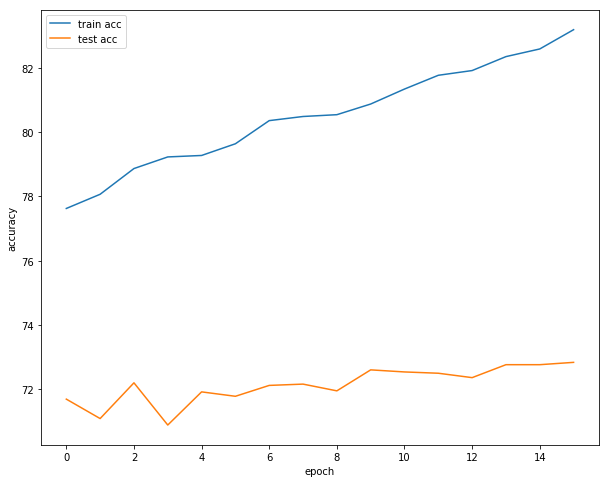

In [23]:
# график зависимости accuracy от эпохи
plt.plot(np.arange(train_accuracy.size), train_accuracy, label='train acc')
plt.plot(np.arange(train_accuracy.size), test_accuracy, label='test acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

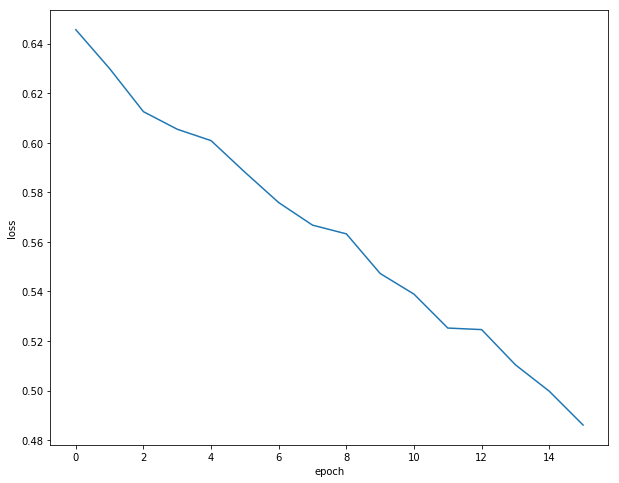

In [24]:
plt.plot(np.arange(train_loss.size), train_loss, label='train loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [28]:
test_acc = 0
test_batches = 0
for batch in iterate_minibatches(prep(X_test), y_test, 500):
    inputs, targets = batch
    acc = accuracy_fun(inputs.transpose(0,3,1,2), targets)
    test_acc += acc
    test_batches += 1
print("Final results:")
print("  test accuracy:\t\t{:.2f} %".format(
    test_acc / test_batches * 100))

if test_acc / test_batches * 100 > 92.5:
    print("Achievement unlocked: колдун 80 уровня")
else:
    print("Нужно больше магии!")

Final results:
  test accuracy:		71.91 %
Нужно больше магии!


In [91]:
test_acc = 0
test_batches = 0
for batch in iterate_minibatches(prep(X_test), prep(y_test), 500):
    inputs, targets = batch
    acc = accuracy_fun(inputs.transpose(0,3,1,2), targets)
    test_acc += acc
    test_batches += 1
print("Final results:")
print("  test accuracy:\t\t{:.2f} %".format(
    test_acc / test_batches * 100))

if test_acc / test_batches * 100 > 92.5:
    print("Achievement unlocked: колдун 80 уровня")
else:
    print("Нужно больше магии!")

Final results:
  test accuracy:		100.00 %
Achievement unlocked: колдун 80 уровня


## Заполните форму

https://goo.gl/forms/EeadABISlVmdJqgr2 

In [31]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [72]:
ytrain

array([4, 8, 8, ..., 9, 0, 5], dtype=int32)